# Solving Classification problem using Keras

We use the data available for the dide-effects of an experimental drug tested on patients to make predictions on new patients who are yet to be given this drug.


### Preprocessing Data


In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

#### Creating a dummy dataset:

* An experimental drug was tested on patients aged between 13 to 100.
* The trial had 2100 patients. First half were under 65 years and second half were 65 years old and above.
* 95% of patients in the second group experienced side-effects
* 95% of patients in the first group experienced no side-effects.

In [2]:
train_labels = []
train_samples = []

for i in range(50):
    firstGroup = randint(13, 64)
    train_samples.append(firstGroup)
    train_labels.append(1)
    
    secondGroup = randint(65, 100)
    train_samples.append(secondGroup)
    train_labels.append(0)
    
for i in range(1000):
    firstGroup = randint(13, 64)
    train_samples.append(firstGroup)
    train_labels.append(0)
    
    secondGroup = randint(65, 100)
    train_samples.append(secondGroup)
    train_labels.append(1)
    


In [3]:
train_labels

[1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,


In [4]:
train_samples

[33,
 74,
 49,
 71,
 14,
 83,
 30,
 93,
 13,
 90,
 30,
 76,
 32,
 75,
 21,
 93,
 40,
 90,
 16,
 80,
 51,
 98,
 52,
 90,
 41,
 99,
 63,
 69,
 14,
 95,
 50,
 81,
 44,
 78,
 49,
 65,
 60,
 89,
 17,
 70,
 34,
 72,
 51,
 93,
 54,
 91,
 32,
 100,
 30,
 82,
 27,
 91,
 36,
 89,
 29,
 91,
 48,
 91,
 16,
 92,
 37,
 87,
 62,
 73,
 47,
 88,
 16,
 67,
 21,
 76,
 43,
 93,
 54,
 77,
 26,
 85,
 25,
 98,
 33,
 66,
 49,
 90,
 39,
 71,
 43,
 87,
 62,
 78,
 60,
 81,
 23,
 65,
 43,
 71,
 54,
 79,
 53,
 90,
 33,
 97,
 35,
 77,
 36,
 76,
 13,
 88,
 55,
 81,
 57,
 82,
 54,
 90,
 61,
 97,
 46,
 79,
 18,
 89,
 56,
 91,
 32,
 92,
 50,
 90,
 39,
 65,
 58,
 94,
 31,
 95,
 45,
 94,
 17,
 89,
 30,
 66,
 34,
 76,
 21,
 81,
 35,
 100,
 64,
 81,
 20,
 85,
 29,
 87,
 35,
 96,
 28,
 98,
 38,
 87,
 52,
 73,
 64,
 70,
 49,
 87,
 31,
 94,
 52,
 66,
 45,
 79,
 46,
 83,
 59,
 65,
 61,
 78,
 17,
 77,
 27,
 65,
 47,
 82,
 13,
 74,
 19,
 86,
 40,
 78,
 52,
 66,
 14,
 97,
 24,
 87,
 62,
 66,
 33,
 87,
 17,
 79,
 49,
 70,
 31,
 74

Converting the numerical data into Numpy array which is the accepted input type for machine learning. Also scaling the training data.

In [6]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [7]:
scaler = MinMaxScaler()

In [8]:
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
scaled_train_samples

array([[0.22988506],
       [0.70114943],
       [0.4137931 ],
       ...,
       [0.87356322],
       [0.45977011],
       [0.73563218]])

### Creating a Model

In [10]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Train a model

In [13]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Note: For below 'fit' method, when we use the 'validation_split' argument, then 'shuffle = True' will not be effective. 
# For validation, last portion of your actual dataset will be split out.

model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 1s - loss: 0.6882 - acc: 0.5820 - val_loss: 0.6781 - val_acc: 0.5571
Epoch 2/20
 - 0s - loss: 0.6679 - acc: 0.6376 - val_loss: 0.6513 - val_acc: 0.6905
Epoch 3/20
 - 0s - loss: 0.6432 - acc: 0.6937 - val_loss: 0.6261 - val_acc: 0.7286
Epoch 4/20
 - 0s - loss: 0.6208 - acc: 0.7312 - val_loss: 0.6005 - val_acc: 0.7429
Epoch 5/20
 - 0s - loss: 0.5979 - acc: 0.7455 - val_loss: 0.5739 - val_acc: 0.7667
Epoch 6/20
 - 0s - loss: 0.5742 - acc: 0.7698 - val_loss: 0.5464 - val_acc: 0.7952
Epoch 7/20
 - 0s - loss: 0.5502 - acc: 0.7926 - val_loss: 0.5185 - val_acc: 0.8190
Epoch 8/20
 - 0s - loss: 0.5263 - acc: 0.8048 - val_loss: 0.4905 - val_acc: 0.8333
Epoch 9/20
 - 0s - loss: 0.5031 - acc: 0.8201 - val_loss: 0.4631 - val_acc: 0.8619
Epoch 10/20
 - 0s - loss: 0.4807 - acc: 0.8376 - val_loss: 0.4365 - val_acc: 0.8857
Epoch 11/20
 - 0s - loss: 0.4594 - acc: 0.8476 - val_loss: 0.4109 - val_ac

### Preprocess Test data

We will be creating a test data having a structure similar to training data we created earlier. This test data will have 250 samples.

In [15]:
test_labels = []
test_samples = []

for i in range(50):
    firstGroup = randint(13, 64)
    test_samples.append(firstGroup)
    test_labels.append(1)
    
    secondGroup = randint(65, 100)
    test_samples.append(secondGroup)
    test_labels.append(0)
    
for i in range(200):
    firstGroup = randint(13, 64)
    test_samples.append(firstGroup)
    test_labels.append(0)
    
    secondGroup = randint(65, 100)
    test_samples.append(secondGroup)
    test_labels.append(1)

Similar to scaling of training data, now time to scale the test data with scaler fit with training data.

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [17]:
scaled_test_samples = scaler.transform((test_samples).reshape(-1, 1))

### Predict

The test data to be predicted with the model created using training data. Following method 'predict' gives us the probability. 
* If the value is near 0 then no side-effect, and 
* if value near 1 then side-effect.

In [21]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [22]:
for i in predictions:
    print(i)

[0.8734623  0.12653767]
[0.18297741 0.8170226 ]
[0.8697863  0.13021371]
[0.13129705 0.868703  ]
[0.8755663  0.12443373]
[0.42150483 0.57849514]
[0.8164205 0.1835795]
[0.06736669 0.93263334]
[0.8671415  0.13285848]
[0.40245506 0.59754497]
[0.87436384 0.12563613]
[0.15030067 0.8496993 ]
[0.44079104 0.559209  ]
[0.18297741 0.8170226 ]
[0.8734623  0.12653767]
[0.05837237 0.94162756]
[0.8752666  0.12473334]
[0.07085145 0.92914855]
[0.61535317 0.38464683]
[0.16062328 0.8393767 ]
[0.8664732  0.13352674]
[0.40245506 0.59754497]
[0.6337917  0.36620834]
[0.05301522 0.94698477]
[0.47984636 0.5201537 ]
[0.05837237 0.94162756]
[0.8755663  0.12443373]
[0.09938049 0.9006195 ]
[0.8734623 0.1265377]
[0.16062328 0.8393767 ]
[0.65184635 0.3481537 ]
[0.07085145 0.92914855]
[0.5965773 0.4034227]
[0.14053036 0.85946965]
[0.669475   0.33052495]
[0.14053036 0.85946965]
[0.51914966 0.4808504 ]
[0.2347438  0.76525617]
[0.8734623 0.1265377]
[0.0925597 0.9074403]
[0.8689565  0.13104352]
[0.17151175 0.8284883 ]
[0

In [23]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [24]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1


### Confusion Matrix

Time to see how well our model has performed.

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [26]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [27]:
# Following function plots the Confusion Matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without Normalization')
        
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without Normalization
[[183  67]
 [ 45 205]]


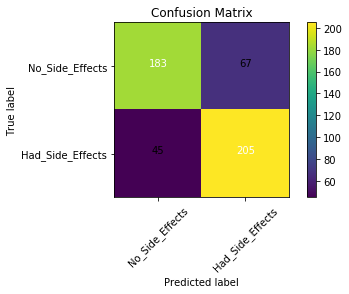

In [28]:
# Calling the plotting function

cm_plot_labels = ['No_Side_Effects', 'Had_Side_Effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

### Save the model

To save the model on the local machine.

###### Type 1: To save the complete model 

In [32]:
model.save('E:\\\Machine_Learning\\Models\\medical_trial_model.h5')

In [33]:
from keras.models import load_model
new_model = load_model('E:\\\Machine_Learning\\Models\\medical_trial_model.h5')

In [34]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [28]:
new_model.get_weights()

[array([[-0.01634306, -0.5630061 ,  0.73466563,  0.2115582 ,  0.25421852,
         -0.5817262 , -0.38309842,  0.444582  , -0.3470469 , -0.09929711,
         -0.25366804, -0.0107376 ,  0.2437472 , -0.07597083,  0.49209857,
          0.4206006 ]], dtype=float32),
 array([ 0.        ,  0.        , -0.10875339,  0.17644982, -0.07851986,
         0.        ,  0.        , -0.11417267,  0.        ,  0.        ,
         0.        ,  0.        ,  0.2246139 ,  0.        , -0.11568926,
        -0.12246583], dtype=float32),
 array([[-5.11497259e-04,  1.27931863e-01,  3.19787115e-01,
         -2.11004913e-02,  2.88741559e-01, -4.02800739e-02,
          9.09093916e-02, -2.97500610e-01,  2.30067402e-01,
         -1.61369443e-02,  6.61724806e-02,  1.31860465e-01,
          8.30626786e-02, -3.60675156e-02,  9.25183296e-03,
          5.77282906e-02, -2.01852545e-01, -5.14090359e-02,
         -9.43182409e-02, -1.13091037e-01,  3.49128217e-01,
         -2.70555198e-01, -2.89139271e-01, -1.65609211e-01,
 

In [29]:
new_model.optimizer

###### Type 2: To store the model architecture alone and not its weights and optimizer, use method 'to_json'

In [30]:
json_string = model.to_json()

In [31]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": 

In [32]:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [33]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


###### Type 3: To save alone the weights and not the architecture use method 'save_weights'

In [34]:
model.save_weights('E:\\\Machine_Learning\\Models\\medical_trial_model_weights.h5')

In [35]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [36]:
model2.load_weights('E:\\\Machine_Learning\\Models\\medical_trial_model_weights.h5')

In [37]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2.get_weights()

[array([[-0.01634306, -0.5630061 ,  0.73466563,  0.2115582 ,  0.25421852,
         -0.5817262 , -0.38309842,  0.444582  , -0.3470469 , -0.09929711,
         -0.25366804, -0.0107376 ,  0.2437472 , -0.07597083,  0.49209857,
          0.4206006 ]], dtype=float32),
 array([ 0.        ,  0.        , -0.10875339,  0.17644982, -0.07851986,
         0.        ,  0.        , -0.11417267,  0.        ,  0.        ,
         0.        ,  0.        ,  0.2246139 ,  0.        , -0.11568926,
        -0.12246583], dtype=float32),
 array([[-5.11497259e-04,  1.27931863e-01,  3.19787115e-01,
         -2.11004913e-02,  2.88741559e-01, -4.02800739e-02,
          9.09093916e-02, -2.97500610e-01,  2.30067402e-01,
         -1.61369443e-02,  6.61724806e-02,  1.31860465e-01,
          8.30626786e-02, -3.60675156e-02,  9.25183296e-03,
          5.77282906e-02, -2.01852545e-01, -5.14090359e-02,
         -9.43182409e-02, -1.13091037e-01,  3.49128217e-01,
         -2.70555198e-01, -2.89139271e-01, -1.65609211e-01,
 